# Partial Nucleus sucked in vs resolution index

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import math
import seaborn as sns
%matplotlib inline

In [2]:
ps = pd.read_csv("patch_seq_log_mouse.csv")

In [3]:
initial = ["Date", "Post patch?", "Post patch pipette R", "Nucleus sucked in?", "Resolution index", 
          "PCR cycles", "SM_QC_PF", "Bad dates"]
ps = ps[initial]

#Changing Date Format
ps["Date"] = pd.to_datetime(ps["Date"], format = "%y%m%d")

#Categories
ps["Post patch?"] = ps["Post patch?"].astype("category")
ps["Nucleus sucked in?"] = ps["Nucleus sucked in?"].astype("category")
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")

#Filtering Columns
ps = ps[ps["PCR cycles"] == 21]      #shows 21 pcr cycles
ps = ps[ps["SM_QC_PF"] != "cnt"]     #shows everything except cnt
ps = ps[ps["Bad dates"] != "x"]      #shows everthing except x

#ps.dropna(subset = ["Post patch?", "Nucleus sucked in?"], returns start date 10/02/17 and data after that date
ps = ps.drop("Bad dates", 1)
ps.dropna(subset = ["Post patch?", "Post patch pipette R", "Nucleus sucked in?",
                    "Resolution index", "SM_QC_PF"], inplace = True)
ps.head()

,Date,Post patch?,Post patch pipette R,Nucleus sucked in?,Resolution index,PCR cycles,SM_QC_PF
7353,2017-10-02,nucleus_absent,10.0,no,0.000000,21.0,fail
7354,2017-10-02,nucleus_present,1000.0,no,0.702701,21.0,pass
7356,2017-10-02,nucleus_absent,40.0,no,0.000000,21.0,fail
7360,2017-10-02,nucleus_present,1100.0,no,0.556320,21.0,pass
7361,2017-10-02,nucleus_present,1400.0,no,0.822494,21.0,pass


## Definitions

In [4]:
def nucleated(x):
    nucleus = x[(x["Post patch?"] == "Nucleated") | (((x["Post patch?"] == "nucleus_visible") | (x["Post patch?"] == "nucleus_present")) & (x["Post patch pipette R"] >= 500))]
    return nucleus

def partial_nucleated(y):
    partial = y[(y["Post patch?"] == 'Partial-Nucleus') | (((y['Post patch?'] == 'nucleus_present') | (y['Post patch?'] == 'nucleus_visible')) & (y["Post patch pipette R"] <= 499))]
    return partial

def outside_out(z):
    outside = z[(z["Post patch?"] == 'Outside-Out') | (((z['Post patch?'] == 'nucleus_absent') | (z['Post patch?'] == 'no_nuclues_visible')) & (z['Post patch pipette R'] >= 500))]
    return outside

def no_seal(w): 
    no = w[(w["Post patch?"] == 'No-Seal') | (((w['Post patch?'] == 'nucleus_absent') | (w['Post patch?'] == 'no_nucleus_visible')) & (w['Post patch pipette R'] <= 499))]
    return no
    
def entire_cell(v):
    entire = v[(v["Post patch?"] == 'Entire-Cell') | (v['Post patch?'] == 'entire_cell')]
    return entire

## Setting Variables for Post Patch Class

In [5]:
nuc = nucleated(ps)
nuc["post patch class"] = "Nucleated"

part_nuc = partial_nucleated(ps)
part_nuc["post patch class"] = "Partial nucleated"

out_out = outside_out(ps)
out_out["post patch class"] = "Outside out"

noSeal = no_seal(ps)
noSeal["post patch class"] = "No seal"

entirecell = entire_cell(ps)
entirecell["post patch class"] = "Entire Cell"

ps.head()

C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

,Date,Post patch?,Post patch pipette R,Nucleus sucked in?,Resolution index,PCR cycles,SM_QC_PF
7353,2017-10-02,nucleus_absent,10.0,no,0.000000,21.0,fail
7354,2017-10-02,nucleus_present,1000.0,no,0.702701,21.0,pass
7356,2017-10-02,nucleus_absent,40.0,no,0.000000,21.0,fail
7360,2017-10-02,nucleus_present,1100.0,no,0.556320,21.0,pass
7361,2017-10-02,nucleus_present,1400.0,no,0.822494,21.0,pass


## Concatenating Post Patch Class to Dataframe

In [6]:
frames = [nuc, part_nuc, out_out, noSeal, entirecell]
ps = pd.concat(frames)
ps.head(10)

,Date,Post patch?,Post patch pipette R,Nucleus sucked in?,Resolution index,PCR cycles,SM_QC_PF,post patch class
7354,2017-10-02,nucleus_present,1000.0,no,0.702701,21.0,pass,Nucleated
7360,2017-10-02,nucleus_present,1100.0,no,0.556320,21.0,pass,Nucleated
7361,2017-10-02,nucleus_present,1400.0,no,0.822494,21.0,pass,Nucleated
7365,2017-10-02,nucleus_present,1000.0,no,0.877682,21.0,pass,Nucleated
7367,2017-10-02,nucleus_present,930.0,no,0.000000,21.0,fail,Nucleated
7371,2017-10-03,nucleus_visible,1000.0,no,0.556320,21.0,pass,Nucleated
7373,2017-10-03,nucleus_visible,1000.0,no,0.795757,21.0,pass,Nucleated
7375,2017-10-03,nucleus_present,1000.0,no,0.795757,21.0,pass,Nucleated
7382,2017-10-03,nucleus_present,1000.0,no,0.322631,21.0,pass,Nucleated
7383,2017-10-03,nucleus_present,2300.0,no,1.000000,21.0,pass,Nucleated


In [7]:
ps["post patch class"].value_counts()
#Theres only 2 data points to view 

Nucleated            25
No seal              11
Partial nucleated     2
Outside out           2
Entire Cell           1
Name: post patch class, dtype: int64

## Plots

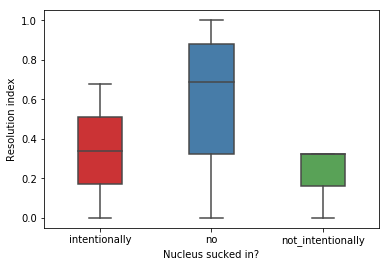

In [8]:
sns.boxplot(x='Nucleus sucked in?', y='Resolution index', data = ps, palette="Set1", width = 0.4)
#Stilll need to rework it but not possible to anlayze part nuc vs resolution index with current data